Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [2]:
#Dimensiones de la imagen a crear
ancho = 300
alto = 200

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

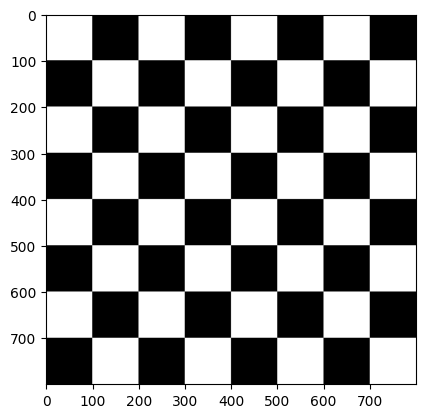

In [35]:
gris_img = np.zeros((800,800,1), dtype = np.uint8)
#Modifica un par de zonas rectangulares de la imagen
for i in range(0,800,100):
    for j in range(0,800,100):
         if (i //100 ) % 2 == (j // 100) % 2:
            gris_img[i:i+100, j:j+100] = 255
    
#Muestra la imagen con matplotlib
#Al ser un plano, recordar especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

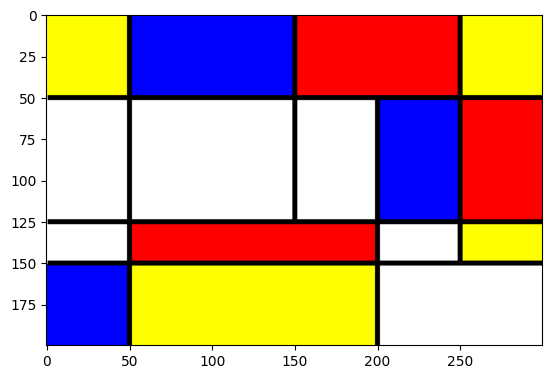

In [11]:
color_img = np.zeros((alto, ancho,3), dtype = np.uint8)
#Capa base - blanco
color_img[:,:,0] = 255
color_img[:,:,1] = 255
color_img[:,:,2] = 255

#Cuadriláteros

for filas in range (0, 200):
    for columnas in range (0, 300):

        #ROJO
        if filas < 50 and columnas > 150 and columnas < 250:
            color_img[:,:,0][ filas, columnas] = 255
            color_img[:,:,1][ filas, columnas] = 0
            color_img[:,:,2][ filas, columnas] = 0

        if filas > 50 and filas < 125 and columnas > 250: 
            color_img[:,:,0][ filas, columnas] = 255
            color_img[:,:,1][ filas, columnas] = 0
            color_img[:,:,2][ filas, columnas] = 0
        
        if filas > 125 and filas < 150 and columnas > 50 and columnas < 200:
            color_img[:,:,0][ filas, columnas] = 255
            color_img[:,:,1][ filas, columnas] = 0
            color_img[:,:,2][ filas, columnas] = 0

        #AZUL
        if filas > 50  and filas < 125 and columnas > 200 and columnas < 250: 
            color_img[:,:,0][ filas, columnas] = 0
            color_img[:,:,1][ filas, columnas] = 0
            color_img[ :, :,2][ filas, columnas] = 255
        
        if filas < 50 and columnas > 50 and columnas < 150:
            color_img[:,:,0][filas,columnas] = 0
            color_img[:,:,1][filas,columnas] = 0
            color_img[:,:,2][filas,columnas] = 255

        if filas > 150  and columnas < 50:
            color_img[:,:,0][filas,columnas] = 0
            color_img[:,:,1][filas,columnas] = 0
            color_img[:,:,2][filas,columnas] = 255

        #AMARILLO
        if filas < 50 and columnas < 50: 
            color_img[:,:,0][filas,columnas] = 255
            color_img[:,:,1][filas,columnas] = 255
            color_img[:,:,2][filas,columnas] = 0
        
        if filas < 50 and columnas > 250:
            color_img[:,:,0][filas,columnas] = 255
            color_img[:,:,1][filas,columnas] = 255
            color_img[:,:,2][filas,columnas] = 0
        
        if filas > 125 and filas < 150 and columnas > 250: 
            color_img[:,:,0][filas,columnas] = 255
            color_img[:,:,1][filas,columnas] = 255
            color_img[:,:,2][filas,columnas] = 0
        
        if filas > 150 and columnas > 50 and columnas < 200:
            color_img[:,:,0][filas,columnas] = 255
            color_img[:,:,1][filas,columnas] = 255
            color_img[:,:,2][filas,columnas] = 0


#Líneas
for filas in range(0, 200):
    for columnas in range(0,300):
        if filas > 48 and filas < 52  and columnas > 0: 
            color_img[filas,columnas] = 0
        if columnas > 0 and filas > 148 and filas < 152: 
            color_img[filas,columnas] = 0
        if columnas > 0 and filas > 123 and filas < 127:
            color_img[filas,columnas] = 0
        if columnas > 48 and columnas < 52:
            color_img[filas,columnas] = 0
        if columnas > 148 and columnas < 152 and filas < 127: 
            color_img[filas,columnas] = 0
        if filas < 152 and columnas > 248 and columnas < 252: 
            color_img[filas,columnas] = 0
        if filas > 48 and columnas > 198 and columnas < 202:
            color_img[filas,columnas] = 0


plt.imshow(color_img)
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

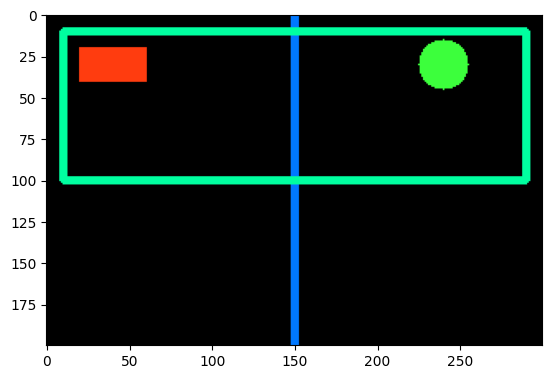

True

In [13]:
#Crea una imagen con res planos
color_img = np.zeros((alto, ancho, 3), dtype = np.uint8)

#Línea central grosor 4
cv2.line(color_img,(int(ancho/2),0),(int(ancho/2),alto),(0,120,255), 4)
#Rectángulo grosor 4
cv2.rectangle(color_img,(10,10),(ancho-10,int(alto/2)), (0,255,160),4)
#Círculo
cv2.circle(color_img,(ancho-60,30), 15, (60,255,60),-1)
#Rectángulo relleno
cv2.rectangle(color_img,(20,20),(60,40),(255,60,15),-1)
#Visualización
plt.imshow(color_img)
plt.show()

#Salva la imagne resultante al disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [32]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        #Changing g
        changed_g = g.copy()
        changed_g[0:h,0:w] = g + b

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, changed_g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [33]:
vid = cv2.VideoCapture(0)

while True: 
    ret, frame  = vid.read()

    h, w, c = frame.shape

    r = frame[:,:,0]
    g = frame[:,:,1]
    b = frame[:,:,2]

    max = 0
    min = 255 *3 *64

    y_max = 0
    x_max = 0
    y_min = 0
    x_min = 0


    #Determinar zona 8x8 más clara y más oscura 
    for i in range(0,h,8):
        for j in range(0,w,8):
            suma_rgb = r[i,j].sum() + g[i,j].sum() + b[i,j].sum()

            if suma_rgb > max: 
                max = suma_rgb
                x_max = j
                y_max = i
            
            if suma_rgb < min: 
                min = suma_rgb
                x_min = j
                y_min = i
    cv2.circle(frame, (x_max, y_max), 8, (255,0,0), -1) #Puntos más claros
    cv2.circle(frame, (x_min, y_min), 8, (0,255,0), -1)

    cv2.imshow('Cam', frame)

    #Detener el programa al presionar ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [34]:

vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Fuerzo a mitad de resolución para ocupar menos pantalla
w = int(w / 2)
h = int(h / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)  # En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Imagen conjunta 2x1 (solo dos imágenes)
collage = np.zeros((h * 2, w, 3), dtype=np.uint8)
top = collage[0:h, 0:w]  # Parte superior
bottom = collage[h:h + h, 0:w]  # Parte inferior

while True:
    # fotograma a fotograma
    ret, frameIN = vid.read()

    # Menor tamaño
    frame = cv2.resize(frameIN, (w, h), cv2.INTER_NEAREST)

    if ret:
        # Separamos canales
        r = frame[:, :, 2]
        g = frame[:, :, 1]
        b = frame[:, :, 0]

        # Jugamos con los valores de los planos para las dos imágenes
        # Imagen superior
        top[:, :, 0] = b  # Canal azul
        top[:, :, 1] = g + 123  # Canal verde
        top[:, :, 2] = r  # Canal rojo

        # Imagen inferior
        bottom[:, :, 0] = 255 - r  # Invertimos el canal rojo
        bottom[:, :, 1] = g  # Mantenemos el canal verde
        bottom[:, :, 2] = b  # Mantenemos el canal azul

        # Muestra composición
        cv2.imshow('Cam', collage)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
